# Preparing Time Series from Wide Form Data
- Steven Phillips
- February 3, 2023

Working with data from https://www.zillow.com/research/data/

- 1. Prepare the dataset for time series analysis.
- 2. Plot the home values for 4 cities and answer questions.



In [2]:
# load imports

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

## Part 1

In [3]:
# Load the data

df = pd.read_csv('/Users/steve/Documents/GitHub/Preparing-Time-Series-from-Wide-Form-Data/Data/ZillowData.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 9/30/2022
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/2000,2/29/2000,...,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
# Filter the 4 largest cities

df_cities = df.loc[0:3,].copy()
df_cities.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/2000,2/29/2000,...,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
# list column names

df_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '1/31/2000', '2/29/2000',
       ...
       '12/31/2021', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022',
       '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022'],
      dtype='object', length=281)

In [6]:
# melt the data from wide form to long form

melted = pd.melt(df_cities,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'], value_name='Value',var_name="Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,1/31/2000,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1/31/2000,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1/31/2000,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1/31/2000,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2/29/2000,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,8/31/2022,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,9/30/2022,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,9/30/2022,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,9/30/2022,272639.0


In [7]:
# convert melted dates into datetime datatype

melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [8]:
# Make the datetime column the index

melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [9]:
# resample the dataframe as monthly frequency

df_ts = melted.groupby('RegionName').resample("MS").mean()
df_ts

C:\Users\steve\AppData\Local\Temp\ipykernel_24520\2828239494.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("MS").mean()


RegionID  SizeRank     Value
RegionName Date                                    
Chicago    2000-01-01   17426.0       3.0  166139.0
           2000-02-01   17426.0       3.0  166536.0
           2000-03-01   17426.0       3.0  167368.0
           2000-04-01   17426.0       3.0  168826.0
           2000-05-01   17426.0       3.0  170499.0
...                         ...       ...       ...
New York   2022-05-01    6181.0       0.0  768797.0
           2022-06-01    6181.0       0.0  773944.0
           2022-07-01    6181.0       0.0  777692.0
           2022-08-01    6181.0       0.0  779960.0
           2022-09-01    6181.0       0.0  781622.0

[1092 rows x 3 columns]

## Part 2

### 1. Plot the home values for all 4 cities.

In [11]:
# df of values grouped by city and date

cities = ['New York','Los Angeles','Chicago', 'Houston']
plot_df = df_ts.loc[cities].copy()
plot_df

RegionID  SizeRank     Value
RegionName Date                                    
New York   2000-01-01    6181.0       0.0  253690.0
           2000-02-01    6181.0       0.0  255517.0
           2000-03-01    6181.0       0.0  257207.0
           2000-04-01    6181.0       0.0  260310.0
           2000-05-01    6181.0       0.0  263204.0
...                         ...       ...       ...
Houston    2022-05-01   39051.0       2.0  265558.0
           2022-06-01   39051.0       2.0  268901.0
           2022-07-01   39051.0       2.0  271059.0
           2022-08-01   39051.0       2.0  272400.0
           2022-09-01   39051.0       2.0  272639.0

[1092 rows x 3 columns]

In [12]:
# drop RegionID and SizeRank

plot_df_values = plot_df.drop(columns = ['RegionID', 'SizeRank'])
plot_df_values

Value
RegionName Date                
New York   2000-01-01  253690.0
           2000-02-01  255517.0
           2000-03-01  257207.0
           2000-04-01  260310.0
           2000-05-01  263204.0
...                         ...
Houston    2022-05-01  265558.0
           2022-06-01  268901.0
           2022-07-01  271059.0
           2022-08-01  272400.0
           2022-09-01  272639.0

[1092 rows x 1 columns]

In [13]:
# unstack the dataframe

unstacked = plot_df_values.unstack(level=0)
unstacked

Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [14]:
# function to return thousands in format as thousandsvalueK

def thousands(x,pos):
    
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    new_x = x/1_000
    
    return f"{new_x:,.0f}K"

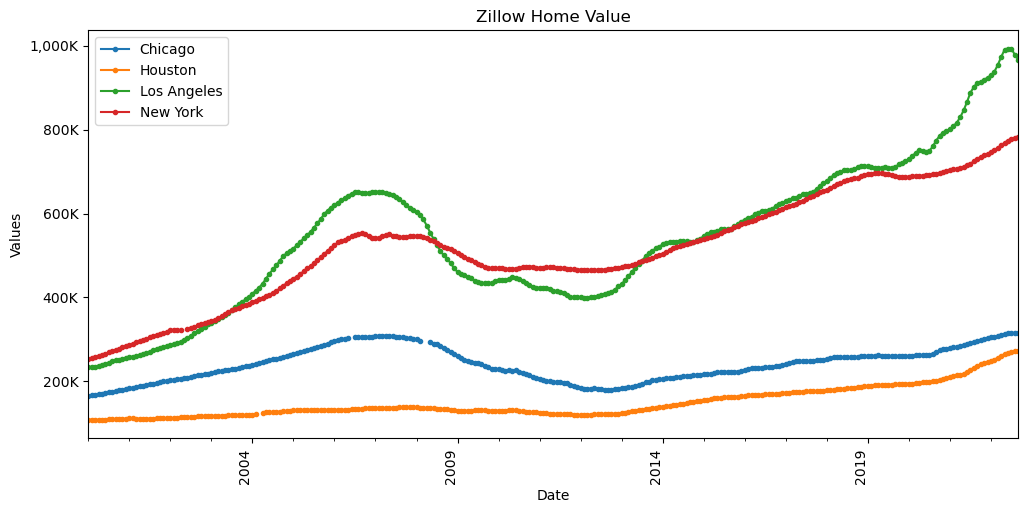

In [22]:
# make the fig/axis

fig, ax = plt.subplots(figsize=(12,6))


ax.set(title='Zillow Home Value', ylabel='Values')

# customize major ticks every 5 years
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# customize minor ticks every 1 year no label
minor_loc =  mdates.YearLocator(1)
ax.xaxis.set_minor_locator(minor_loc)

# y ticks 
fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)


# plot time series with Pandas
unstacked['Value'].plot(style='.-', ax=ax, label = 'Mean Yearly Temperature')

# Final xdate adjustment
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

ax.legend();


### 2 Questions:

- Which City had the highest Typical Home Value at the end of 2008? Which had the least?

- How much did the home values change from November 2008 to December 2008(in dollars)?

Los Angeles had the highest Typical Home Value at the end of 2008 and Houston had the least Typical Home Value at the end of 2008.